In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle as pkl
from keras.callbacks import Callback, ModelCheckpoint
from copy import deepcopy


In [ ]:
root_folder = '/content/drive/MyDrive/магистратура/Обработка и анализ изображений/data/'

In [ ]:
with open(root_folder+'train_orig.pkl','rb') as train_sample, open(root_folder+'test_orig.pkl','rb') as test_sample, open(root_folder+'train_label.pkl','rb') as train_label, open(root_folder+'test_label.pkl','rb') as test_label:
  x_train = pkl.load(train_sample)
  x_test = pkl.load(test_sample)
  y_train = pkl.load(train_label)
  y_test = pkl.load(test_label)

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
print(x_train.shape)

(800, 100, 100)


In [ ]:
size =  100

In [ ]:
counters = np.array([0,0,0,0], dtype = int)
x_train_update = []
y_train_update = np.array([])
for i in range(len(x_train)):
  if y_train[i] == 0 and counters[0]<=size:
    x_train_update.append(x_train[i])
    counters[0]+=1
    y_train_update = np.append(y_train_update, [0])
  elif y_train[i] == 1 and counters[1]<=size:
    x_train_update.append(x_train[i])
    counters[1] += 1
    y_train_update = np.append(y_train_update, [1])
  elif y_train[i] == 2 and counters[2]<=size:
    x_train_update.append(x_train[i])
    counters[2] += 1
    y_train_update = np.append(y_train_update, [2])
  elif y_train[i] == 3 and counters[3]<=size:
    x_train_update.append(x_train[i])
    counters[3] += 1
    y_train_update = np.append(y_train_update, [3])


In [ ]:
x_train_update = np.asarray(x_train_update)

In [ ]:
model = keras.Sequential([
    Input(shape = (100, 100, 1)),
    Convolution2D(24, kernel_size = (5, 5), activation='relu'),
    MaxPooling2D(pool_size = (4, 4)),
    Convolution2D(18, kernel_size = (4, 4), activation='relu'),
    MaxPooling2D(pool_size = (4, 4)),
    Flatten(),
    Dense(4, activation='softmax')
])
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.003),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 96, 96, 24)        624       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 21, 21, 18)        6930      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 18)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 450)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                

In [ ]:
check_point = ModelCheckpoint(root_folder+f'model_train_{size}.h5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
history = model.fit(x_train_update, y_train_update, batch_size=512, epochs=250, callbacks = [check_point], validation_split=0.2, verbose = 0)

Epoch 1/250
1/1 [==============================] - 1s 945ms/step - loss: 1.3362 - acc: 0.2934 - val_loss: 1.2034 - val_acc: 0.2787
Epoch 2/250
1/1 [==============================] - 0s 87ms/step - loss: 1.1986 - acc: 0.3926 - val_loss: 1.1736 - val_acc: 0.2787
Epoch 3/250
1/1 [==============================] - 0s 62ms/step - loss: 1.1201 - acc: 0.3760 - val_loss: 1.1791 - val_acc: 0.1967
Epoch 4/250
1/1 [==============================] - 0s 88ms/step - loss: 1.0989 - acc: 0.3678 - val_loss: 1.1165 - val_acc: 0.2295
Epoch 5/250
1/1 [==============================] - 0s 57ms/step - loss: 1.0893 - acc: 0.4215 - val_loss: 1.1665 - val_acc: 0.3115
Epoch 6/250
1/1 [==============================] - 0s 57ms/step - loss: 1.1027 - acc: 0.3388 - val_loss: 1.1432 - val_acc: 0.1967
Epoch 7/250
1/1 [==============================] - 0s 54ms/step - loss: 1.1035 - acc: 0.3678 - val_loss: 1.1492 - val_acc: 0.1967
Epoch 8/250
1/1 [==============================] - 0s 59ms/step - loss: 1.0880 - acc: 0.3

In [ ]:
# with open(root_folder+'ADAM_HIST_4k.pkl','wb') as best_hist:
#   pkl.dump(history.history, best_hist)

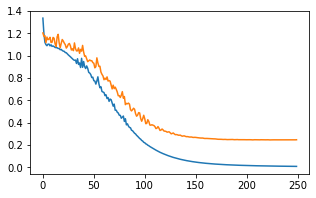

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 76ms/step - loss: 0.0320 - acc: 1.0000


[0.032012201845645905, 1.0]

In [ ]:
# model.save(root_folder+'ADAM_MODEL_4k.h5')

Подгрузка шумов

In [ ]:
with open(root_folder+"test_20.pkl",'rb') as noize_20, open(root_folder+"test_50.pkl",'rb') as noize_50, open(root_folder+"test_100.pkl",'rb') as noize_100, open(root_folder+"test_200.pkl",'rb') as noize_200:
  sample_2 = pkl.load(noize_20)/255
  sample_3 = pkl.load(noize_50)/255
  sample_4 = pkl.load(noize_100)/255
  sample_5 = pkl.load(noize_200)/255

In [ ]:
model.evaluate(sample_2, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.0503 - acc: 1.0000


[0.05026440694928169, 1.0]

In [ ]:
model.evaluate(sample_3, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0839 - acc: 0.9500


[0.08388100564479828, 0.949999988079071]

In [ ]:
model.evaluate(sample_4, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0808 - acc: 0.9500


[0.08075286448001862, 0.949999988079071]

In [ ]:
model.evaluate(sample_5, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.4248 - acc: 0.8500


[0.42483028769493103, 0.8500000238418579]

In [ ]:
with open(root_folder+'test_triplex_font.pkl','rb') as triplex_test,open(root_folder+'test_triplex_font_label.pkl','rb') as triplex_test_label:
  triplex_sample = pkl.load(triplex_test)/255
  triplex_label = pkl.load(triplex_test_label)-1 

with open(root_folder+'test_width_font.pkl','rb') as width_test,open(root_folder+'test_width_font_label.pkl','rb') as width_test_label:
  width_sample = pkl.load(width_test)/255
  width_label = pkl.load(width_test_label)-1 

In [ ]:
model.evaluate(triplex_sample, triplex_label)

25/25 [==============================] - 0s 7ms/step - loss: 3.9345 - acc: 0.4363


[3.934483289718628, 0.4362500011920929]

In [ ]:
model.evaluate(width_sample, width_label)

25/25 [==============================] - 0s 7ms/step - loss: 7.3216 - acc: 0.3638


[7.321608066558838, 0.36375001072883606]